Импорт необходимых библиотек

In [3]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from pprint import pprint

1. Импорт данных

In [4]:
data = pd.read_csv('Admission_Predict.csv')

2. Данные

In [5]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [6]:
data.columns = data.columns.str.strip()
column_dict = {index: column for index, column in enumerate(data.columns[1::])}

data.head(0)
pprint(column_dict)

{0: 'GRE Score',
 1: 'TOEFL Score',
 2: 'University Rating',
 3: 'SOP',
 4: 'LOR',
 5: 'CGPA',
 6: 'Research',
 7: 'Chance of Admit'}


- GRE Score: Балл на GRE (Graduate Record Examination).
- TOEFL Score: Балл на TOEFL (Test of English as a Foreign Language).
- University Rating: Рейтинг университета (от 1 до 5).
- SOP: Оценка заявления о намерениях (Statement of Purpose).
- LOR: Оценка рекомендательного письма (Letter of Recommendation).
- CGPA: Средний балл по всем предметам (Cumulative Grade Point Average).
- Research: Наличие исследовательского опыта (0 или 1).
- Chance of Admit: Вероятность поступления, которая является целевой переменной.

3. Задача

Цель данного анализа заключается в оценке вероятности поступления студентов в университеты на основе различных факторов.
Целевая переменная — Chance of Admit, которая представляет собой вероятность поступления и является непрерывной, принимающей значения от 0 до 1.

4. Гистограмма

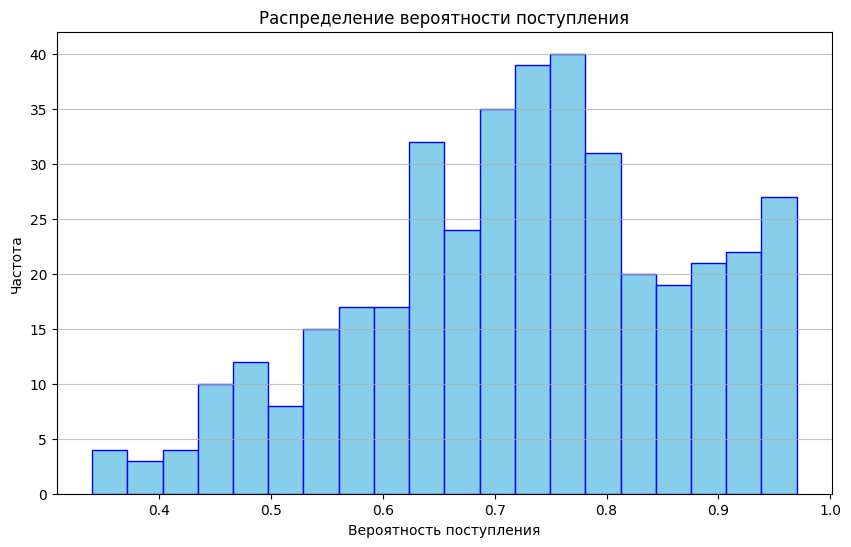

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(data[column_dict[7]], 20, color='skyblue', edgecolor = 'blue')
plt.title('Распределение вероятности поступления')
plt.xlabel('Вероятность поступления')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

5. Количество уникальных значений

In [8]:
count_unique_value = data[column_dict[7]].nunique()
print(f'Количество уникальных значений целевой переменной: {count_unique_value}')

Количество уникальных значений целевой переменной: 60


6. Основные статистика по переменным в датасете

In [9]:
statistics = data.describe()
print(statistics)

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

              LOR        CGPA    Research  Chance of Admit  
count  400.000000  400.000000  400.000000       400.000000  
mean     3.452500    8.598925    0.547500         0.724350  
std      0.898478    0.596317    0.498362         0.142609  
min      1.000000    6.800000    0.000000         0.340000  
2

7. Основная информация по датасету

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


7. Количество пропусков 

In [11]:
null_values = data.isnull().sum()
print('Количество пропусков в каждом столбцах')
print(null_values)

Количество пропусков в каждом столбцах
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


8. Гистограммы по 5 признакам

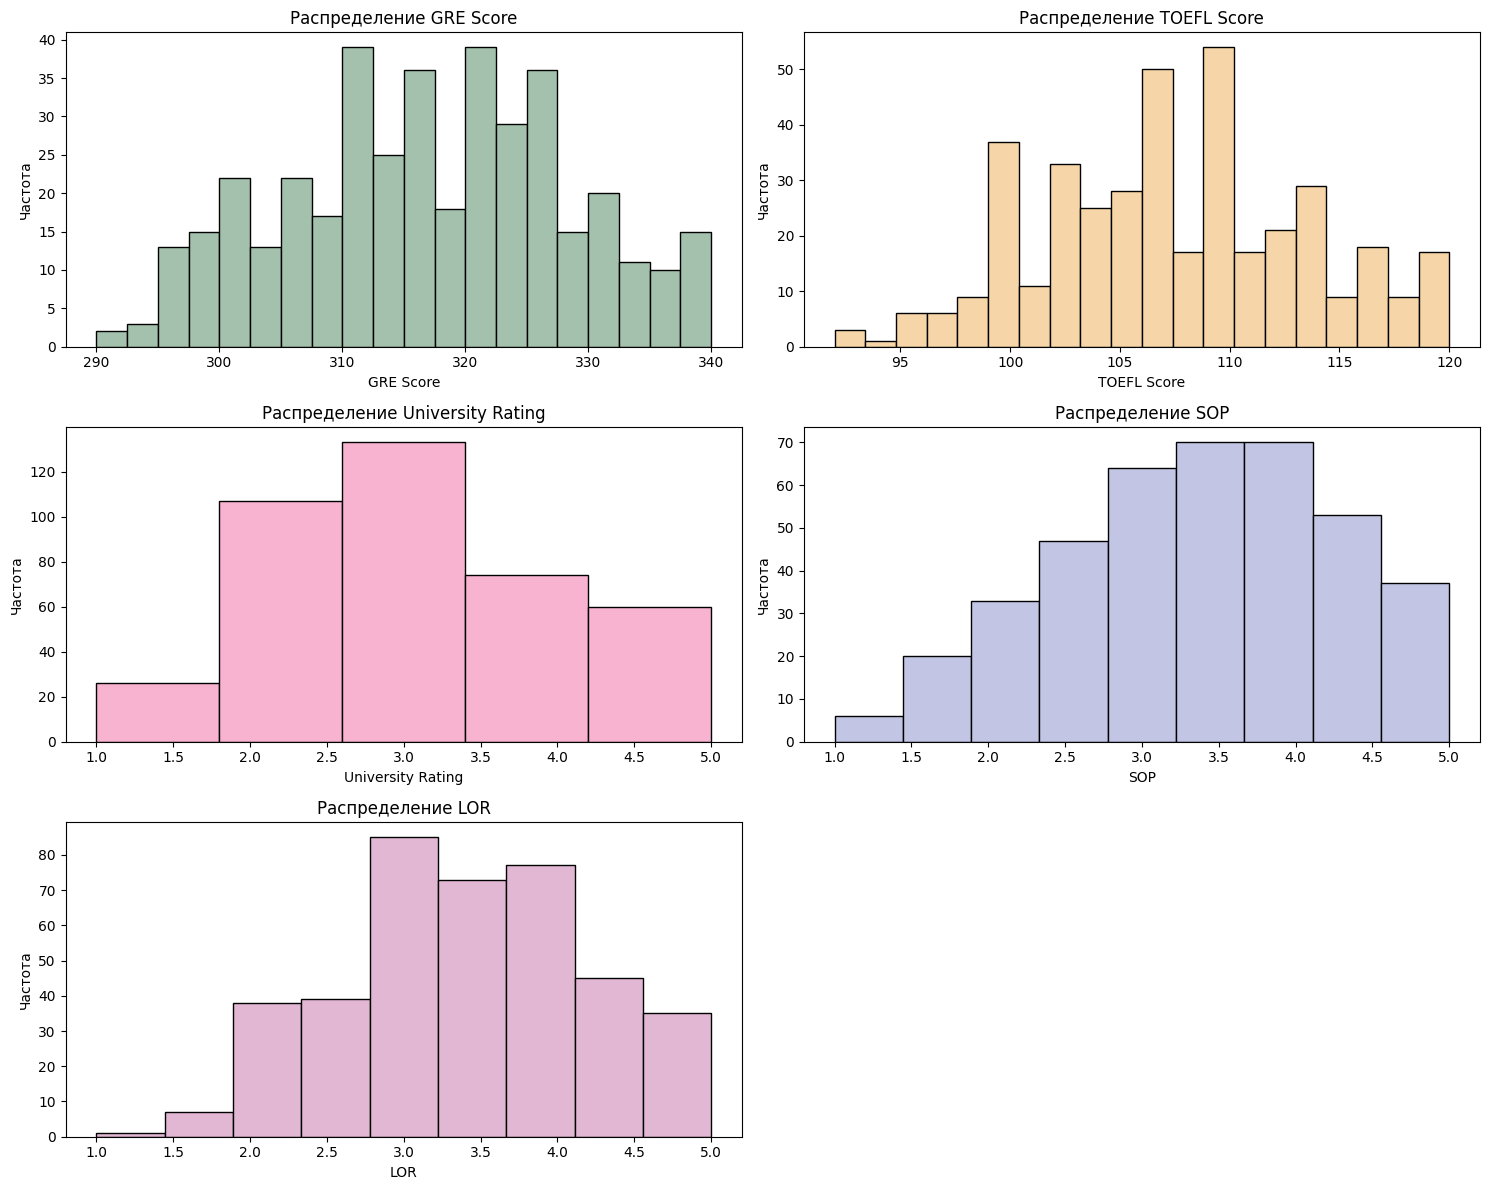

In [12]:
colors = {
    1: '#a3c1ad',
    2: '#f6d6a8',
    3: '#f8b3d0',
    4: '#c2c6e4', 
    5: '#e2b7d4'
}

def plot_histogram(data, column, color, bins=20):
    plt.hist(data[column], bins=bins, color=color, edgecolor='black')
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
plot_histogram(data, column_dict[0], color=colors[1])

plt.subplot(3, 2, 2)
plot_histogram(data, column_dict[1], color=colors[2])

plt.subplot(3, 2, 3)
plot_histogram(data, column_dict[2], color=colors[3], bins=5)

plt.subplot(3, 2, 4)
plot_histogram(data, column_dict[3], color=colors[4], bins=9)

plt.subplot(3, 2, 5)
plot_histogram(data, column_dict[4], color=colors[5], bins=9)

plt.tight_layout()
plt.show()

9.  Графики зависимости 5 любых переменных от целевой переменной

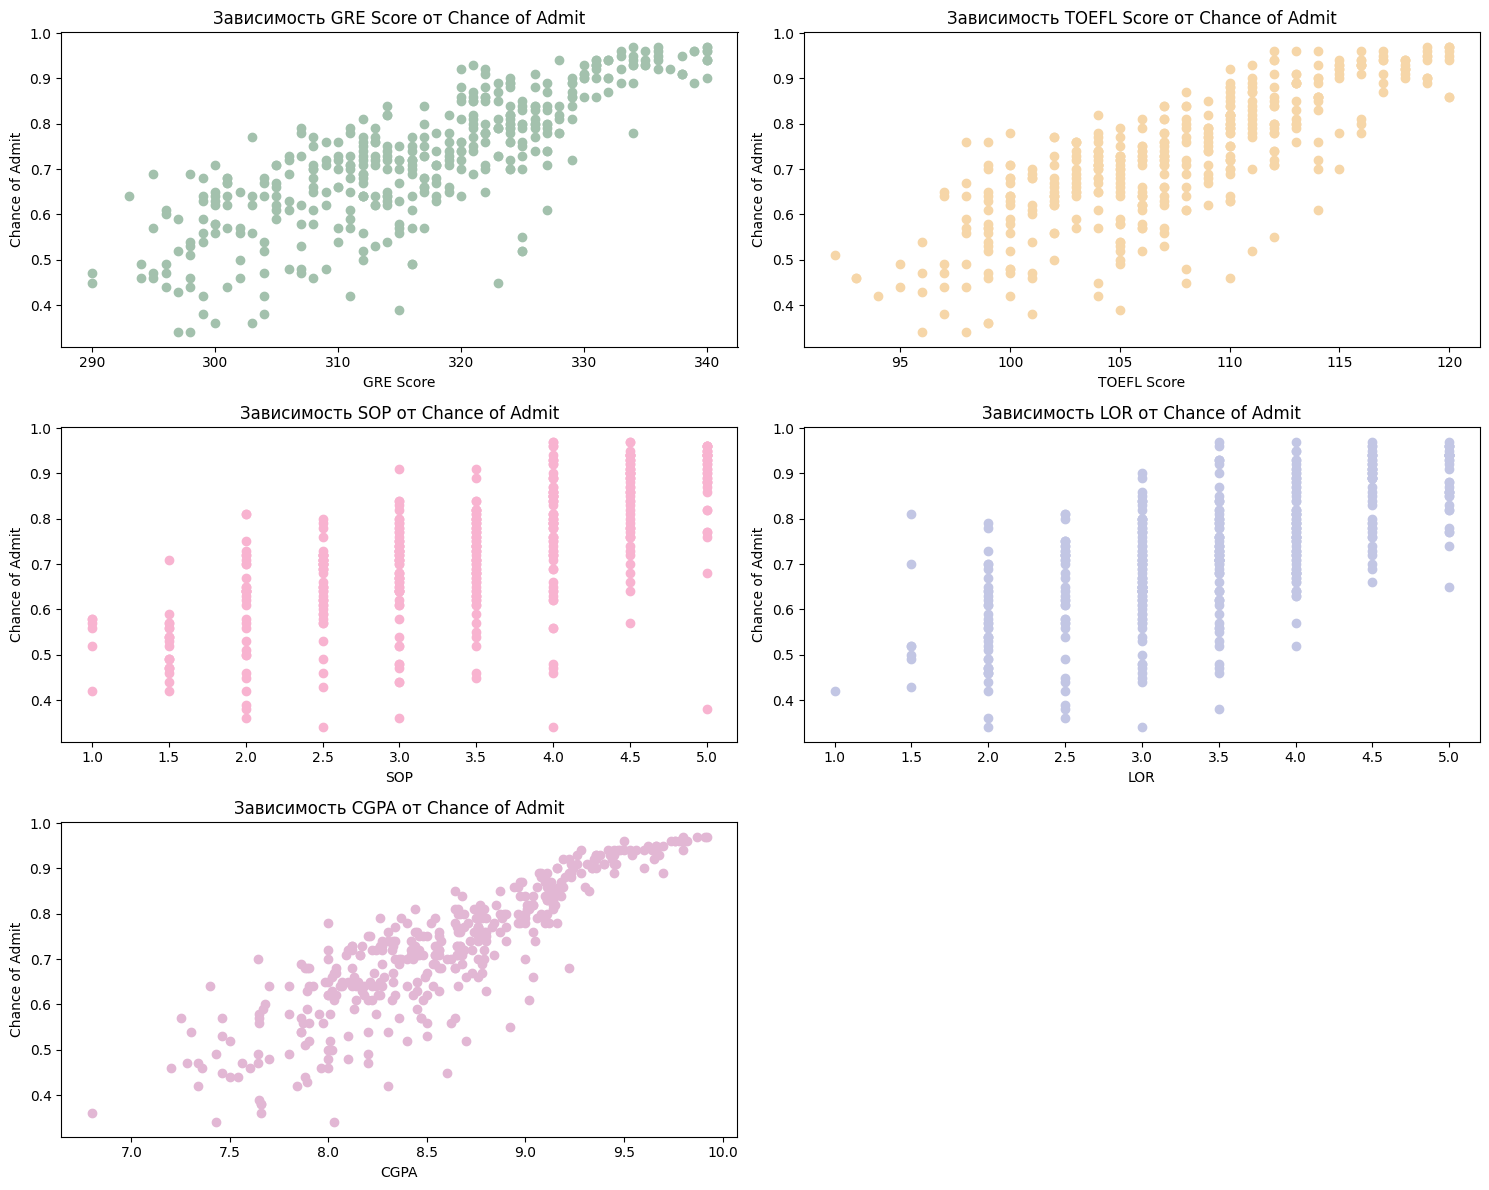

In [13]:
def plot_scatter(data, x_column, color, y_column='Chance of Admit'):
    plt.scatter(data[x_column], data[y_column], color=color)
    plt.title(f'Зависимость {x_column} от {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)

plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
plot_scatter(data, column_dict[0], color=colors[1])

plt.subplot(3, 2, 2)
plot_scatter(data, column_dict[1], color=colors[2])

plt.subplot(3, 2, 3)
plot_scatter(data, column_dict[3], color=colors[3])

plt.subplot(3, 2, 4)
plot_scatter(data, column_dict[4], color=colors[4])

plt.subplot(3, 2, 5)
plot_scatter(data, column_dict[5], color=colors[5])

plt.tight_layout()
plt.show()